In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

### Evaluation TSA checkpoint numbers
- TSA checkpoint numbers can be found: https://www.tsa.gov/coronavirus/passenger-throughput
- Travel is down ~90% year over year

In [28]:
tsa = pd.read_csv('../data/tsa_numbers.csv')
tsa['date'] = pd.to_datetime(tsa['date'])
tsa.sort_values('date', ascending=True, inplace=True)
print(tsa.shape)
tsa.head()

(81, 3)


,date,passengers,passengers_year_ago
80,2020-03-01,2280522,2301439
79,2020-03-02,2089641,2257920
78,2020-03-03,1736393,1979558
77,2020-03-04,1877401,2143619
76,2020-03-05,2130015,2402692


In [29]:
# Calculate current passenger percent of previous years count
tsa['yearly_relative_percent'] = tsa['passengers'] / tsa['passengers_year_ago'] * 100

# Calculate percent change in passengers week over week
tsa['weekly_percent_change'] = tsa['passengers'].pct_change(periods=7) * 100

tsa.tail()

,date,passengers,passengers_year_ago,yearly_relative_percent,weekly_percent_change
4,2020-05-16,193340,2091116,9.245781,14.011086
3,2020-05-17,253807,2620276,9.686270,26.388467
2,2020-05-18,244176,2615691,9.335048,13.230541
1,2020-05-19,190477,2312727,8.236035,16.710272
0,2020-05-20,230367,2472123,9.318590,30.396169


In [30]:
print('Down year over year:', 100 - tsa.loc[tsa['date'] == tsa['date'].max(), 'yearly_relative_percent'].values[0])
print('Week over week change:', tsa.loc[tsa['date'] == tsa['date'].max(), 'weekly_percent_change'].values[0])

Down year over year: 90.68141026963464
Week over week change: 30.396169063831955


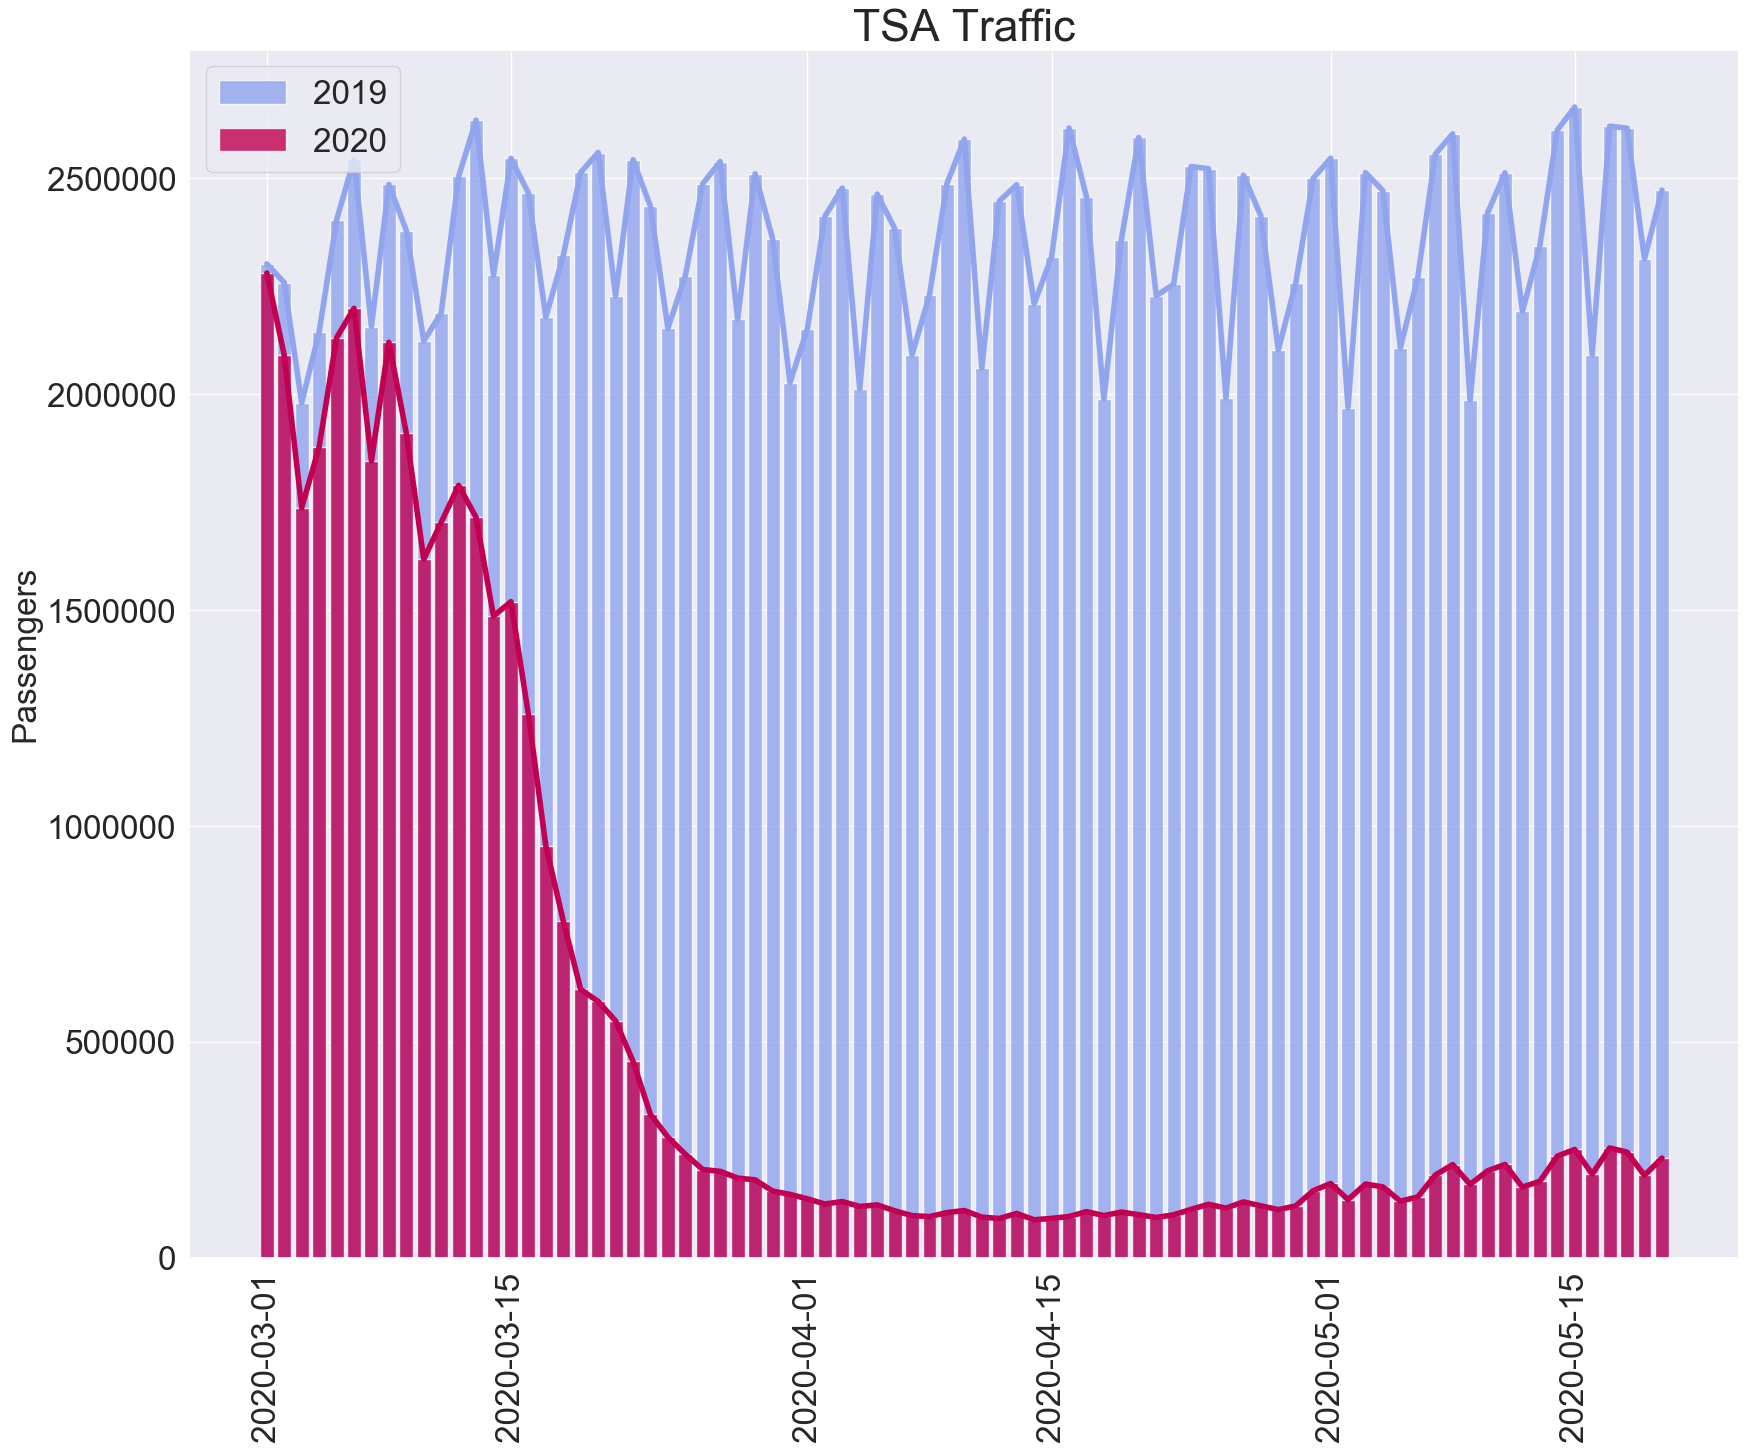

In [49]:
# Distribution of counts
plt.figure(figsize=(20,16), dpi=100)
# plt.plot(tsa['date'], tsa['passengers'], linewidth=8.0, c='#C20051')
# plt.plot(tsa['date'], tsa['passengers_year_ago'], linewidth=8.0, c='#90A5ED')
plt.bar(tsa['date'], tsa['passengers_year_ago'], color='#90A5ED', alpha=0.8, label='2019')
plt.bar(tsa['date'], tsa['passengers'], color='#C20051', alpha=0.8, label='2020')
plt.title('TSA Traffic', fontsize=32)
plt.ylabel('Passengers', fontsize=24)
plt.xticks(rotation=90, fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=24)
plt.savefig('../images/tsa_counts.png')
plt.show()

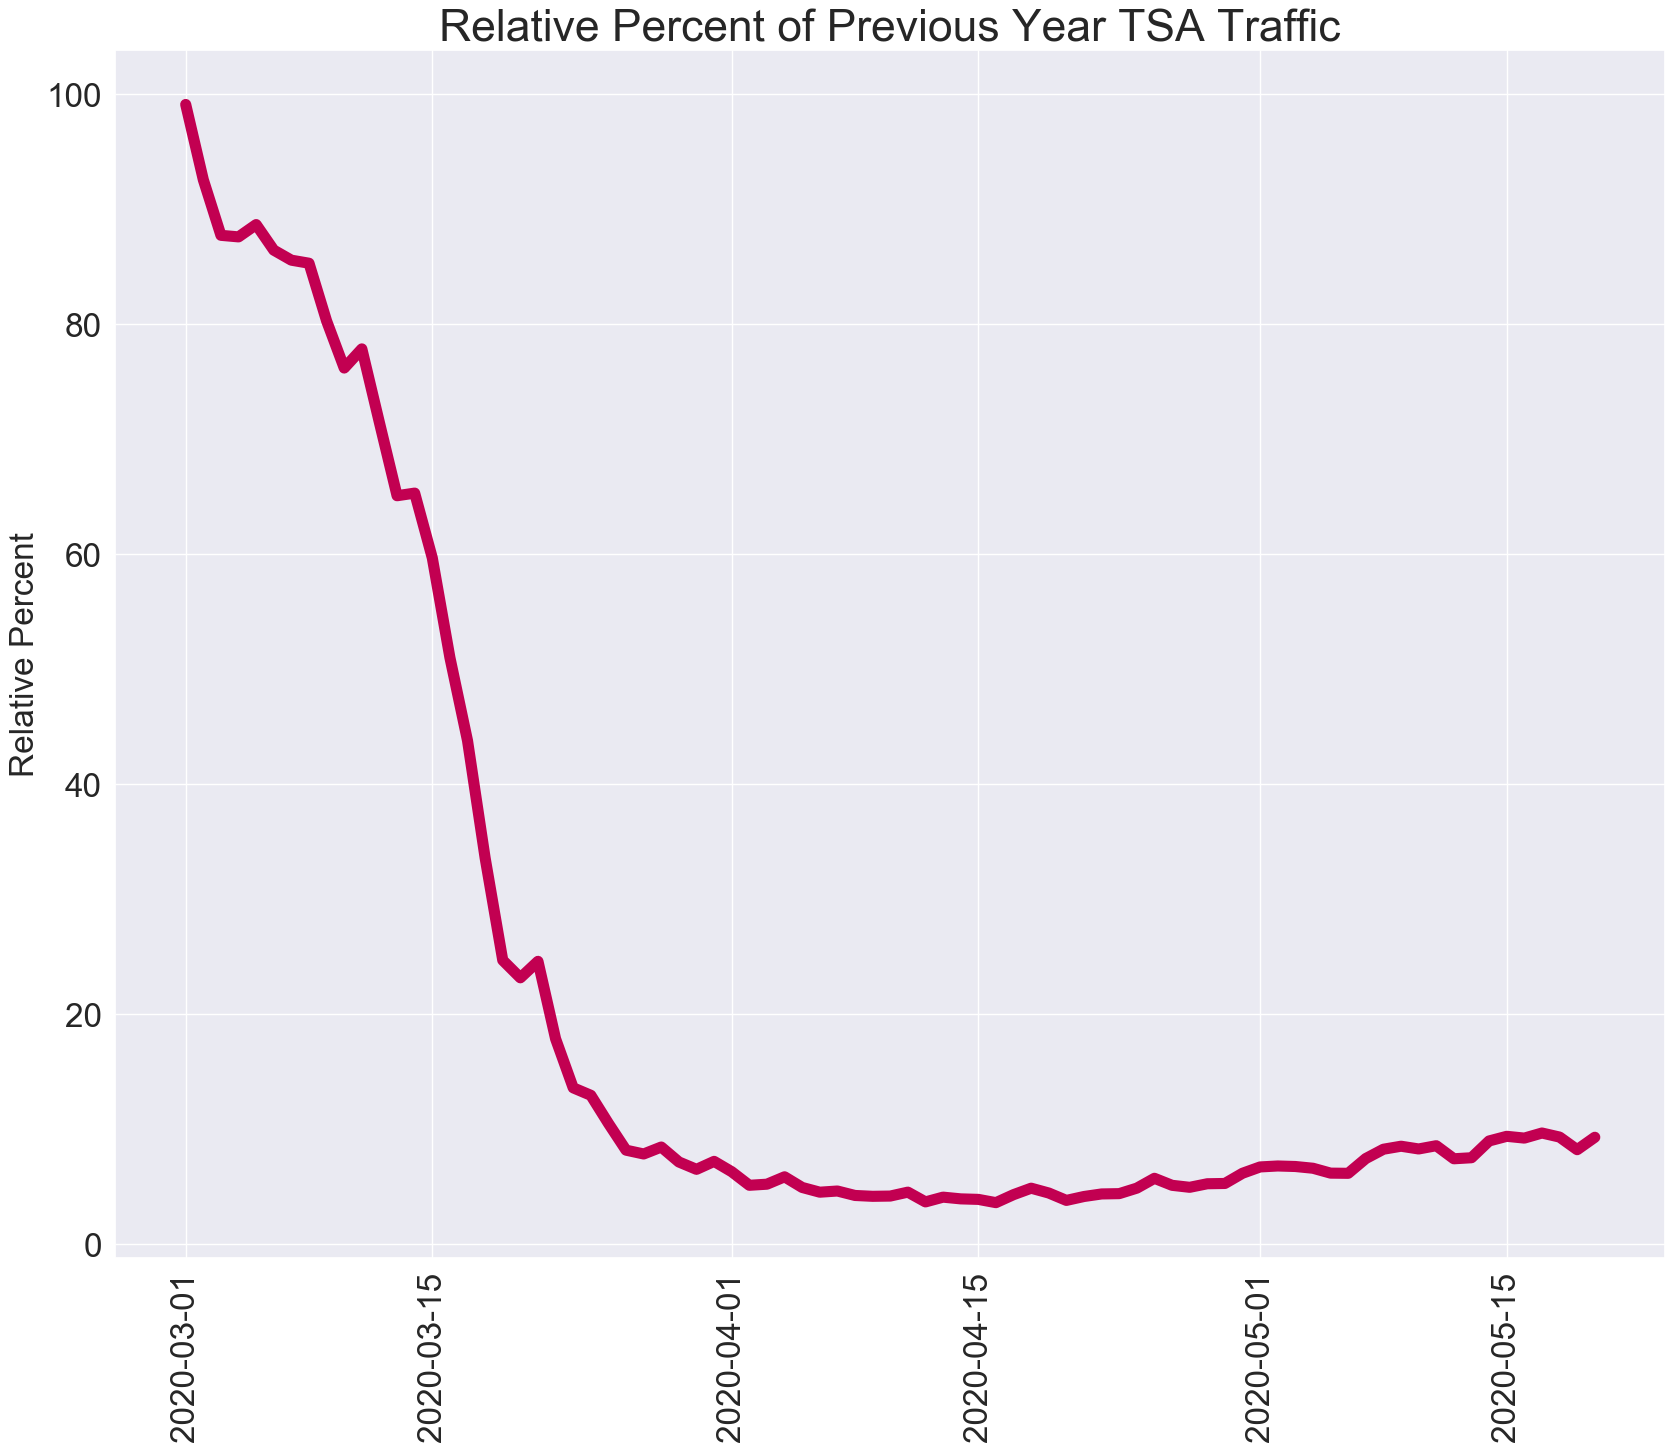

In [31]:
plt.figure(figsize=(20,16), dpi=100)
plt.plot(tsa['date'], tsa['yearly_relative_percent'], linewidth=8.0, c='#C20051')
plt.title('Relative Percent of Previous Year TSA Traffic', fontsize=32)
plt.ylabel('Relative Percent', fontsize=24)
plt.xticks(rotation=90, fontsize=24)
plt.yticks(fontsize=24)
plt.savefig('../images/tsa_year_over_year.png')
plt.show()

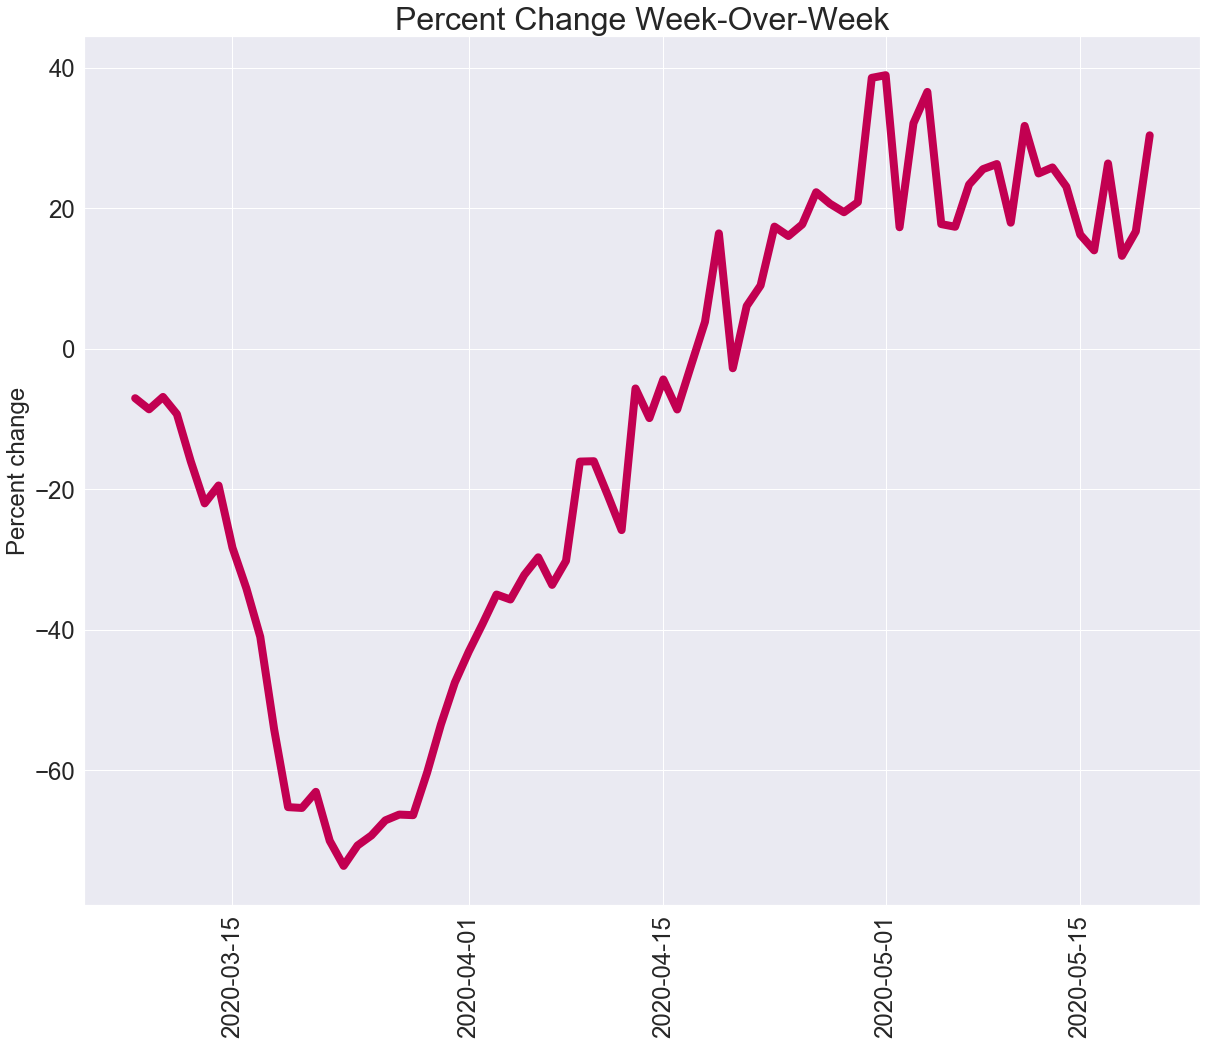

In [32]:
plt.figure(figsize=(20,16))
plt.plot(tsa['date'], tsa['weekly_percent_change'], linewidth=8.0, c='#C20051')
plt.title('Percent Change Week-Over-Week', fontsize=32)
plt.ylabel('Percent change', fontsize=24)
plt.xticks(rotation=90, fontsize=24)
plt.yticks(fontsize=24)
plt.savefig('../images/tsa_week_over_week.png')
plt.show()